# CS 109A/STAT 121A/AC 209A/CSCI E-109A: Homework 2
# Linear and k-NN Regression


**Harvard University**<br/>
**Fall 2017**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, Rahul Dave, Margo Levine

---

### INSTRUCTIONS

- To submit your assignment follow the instructions given in canvas.
- Restart the kernel and run the whole notebook again before you submit. 
- Do not include your name(s) in the notebook even if you are submitting as a group. 
- If you submit individually and you have worked with someone, please include the name of your [one] partner below. 

---

Import libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
%matplotlib inline
import seaborn as sns
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

sns.set_context('poster')

# Predicting Taxi Pickups in NYC

In this homework, we will explore k-nearest neighbor, linear and polynomial regression methods for predicting a quantitative variable. Specifically, we will build regression models that can predict the number of taxi pickups in New York city at any given time of the day. These prediction models will be useful, for example, in monitoring traffic in the city.

The data set for this problem is given in files `dataset_1_train.txt` and `dataset_1_test.txt` as separate training and test sets. The first column in each file contains the time of a day in minutes, and the second column contains the number of pickups observed at that time. The data set covers taxi pickups recorded during different days in Jan 2015 (randomly sampled across days and time of that day).

We will fit regression models that use the time of the day (in minutes) as a predictor and predict the average number of taxi pick ups at that time. The models will be fitted to the training set, and  evaluated on the test set. The performance of the models will be evaluated using the $R^2$ metric. 

**Data Normalization:** As a first step, we suggest that you normalize the `TimeMin` predictor to a value between 0 and 1. This can be done by dividing the time column in the training and test sets by 1440 (i.e. the maximum value the predictor can take). This normalization step would be particularly helpful while fitting polynomial regression models on this data.

# Part (0): EDA

Generate a scatter plot of the training data points, with the time of the day on the X-axis and the number of taxi pickups on the Y-axis. Does the pattern of taxi pickups make intuitive sense to you?

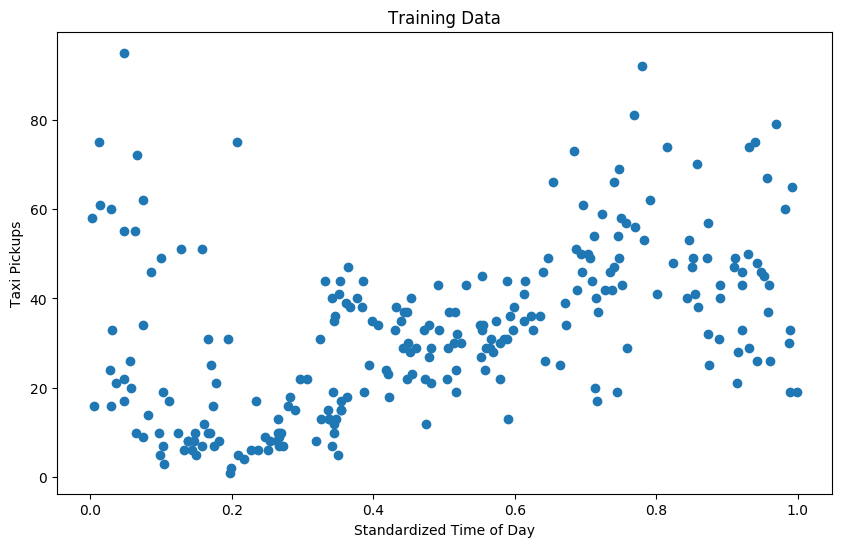

In [9]:
# Read in data
train = pd.read_csv('dataset_1_train.txt')
train['TimeMin'] = train['TimeMin']/1440
x_train = train['TimeMin'].values
y_train = train['PickupCount'].values
# Create Scatter plot
sns.reset_defaults()
plt.figure(figsize=(10, 6))
plt.plot(x_train,y_train, marker='o', linestyle='None')
plt.xlabel('Standardized Time of Day')
plt.ylabel('Taxi Pickups')
plt.title('Training Data')
plt.show()

This pattern of taxi pickups does make sense because there are the most pickups at night. There is also a rise in taxi pickus in the morning which could correspond to people going to work.

# Part (a): k-Nearest Neighbors

We begin with k-Nearest Neighbors (k-NN), a non-parametric regression technique. You may use `sklearn`'s built-in functions to run k-NN regression. Create a `KNeighborsRegressor` object, use the `fit` method in the object to fit a k-NN regressor model, use the `predict` method to make predictions from the model, and the `score` method to evaluate the $R^2$ score of the model on a data set.

- Fit k-NN regression models:
    - Fit a k-NN regression model to the training set for different values of $k$ (e.g. you may try out values 1, 2, 10, 25, 50, 100 and 200). 
    - If you are using `sklearn`'s built-in functions for k-NN regression, explain what happens when you invoke the `fit` function. 
    - If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?
- Visualize the fitted models: 
    - Generate a scatter plot of the training data points, and in the same figure, also generate line plots of the predicted values $\hat{y}$ from each fitted model as a function of the predictor variable $x$. (*Hint:* you will want to sort the $x$ values before plotting.)
    - How does the value of $k$ effect the fitted model?
- Evaluate the fitted models:
    - Compute the $R^2$ score for the fitted models on both the training and test sets. Are some of the calculated $R^2$ values negative? If so, what does this indicate? What does a $R^2$ score of 0 mean?
    - Make plots of the training and test $R^2$ values as a function of $k$. Do the training and test $R^2$ plots exhibit different trends? Explain how the value of $k$ influences the training and test $R^2$ values.

1.*Explain what happens when you invoke the fit function*

When we state our first function (KNeighborsRegressor), we created a function generating function that takes a number of neighbors as an argument. When we use the “fit” function, we are giving the KNeigborsRegressor function the data set that it will run it’s k-neighbors regression on. That way, when we run the predict function, it has the data set to run the k-neighbors regression on, given the number of neighbors to predict on.

2.*If n is the number of observations in the training set, what can you say about a k-NN regression model that uses  k=n?*

If the k-NN regression model uses $k=n$, then every predicted point will be an average of all points in the data set, so the output will be a line at the mean of the dataset.

3.*How does the value of  k effect the fitted model?*

If the value of k is too small (see the $n=2$ line of our graph), then the predicted regression line will have too much noise, however if k is too large (see the n=200 line of our graph), then the predicted regression line will not fit the data well enough and will hug the mean. So, as you can see in the graph, a moderate value for $n$ gives the best results (see the $n=50$ and $n=100$ lines of our graph).

4.*Are some of the calculated  $R^2$ values negative? If so, what does this indicate?*

Some of the calculated $R^2$ values are indeed negative. This indicates that the prediction for the y-values is farther off from correct than the average of the y-values is. R^2 is not in fact a squared value because it is 1 – (predictor/mean), so it doesn’t break any rules of math that it is negative. It just means that the predictors were worse than the mean for every value of x.

5.*What does a  $R^2$ score of 0 mean?*

An $R^2$ value of 0 means that the prediction performed exactly as well as the exact mean of the data set.

6.*Do the training and test  $R^2$ plots exhibit different trends?*

As k gets larger, the training and test set do exhibit similar trends; both the training and test decrease their $R^2$ value as k increased.

7.*Explain how the value of  k influences the training and test  $R^2$ values.*

As the value of k increases, the value of $(y – \hat{y})$ approaches the value of $\bar{y}$, implying that the prediction of y just approach the mean of y as k increases. If the prediction approaches the mean, then the value of $R^2$ will approach zero.

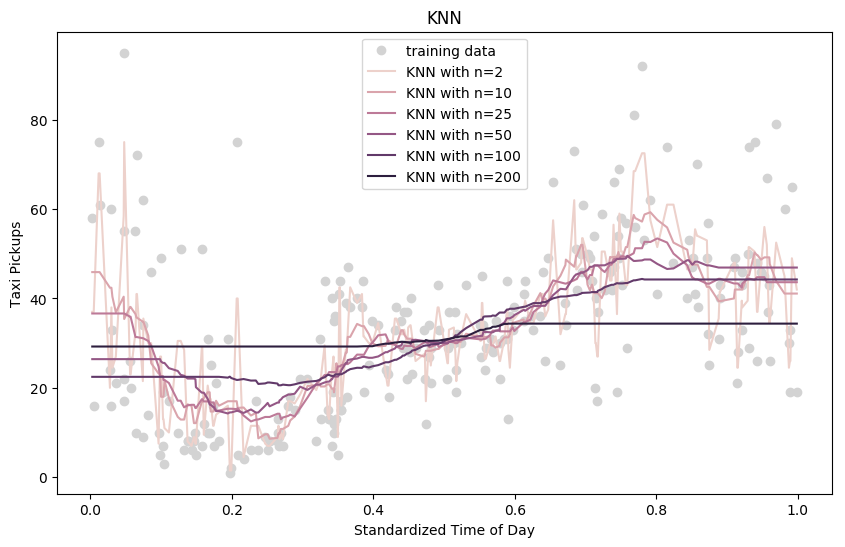

In [10]:
# Make x in a suitable form for KNN
X_train = [[x] for x in x_train]
sns.reset_defaults()
with sns.cubehelix_palette(6):
    plt.figure(figsize=(10, 6))
    plt.plot(x_train,y_train, marker='o', linestyle='None', color = 'lightgray', label = 'training data')
    for n in [ 2, 10, 25, 50, 100,200]:
        knn_model = KNeighborsRegressor(n_neighbors=n)
        # Fit model and sort by x's
        knn_model.fit(X_train, y_train) 
        model = pd.DataFrame.from_records(list(zip(x_train, knn_model.predict(X_train)))).sort_values(0)
        xNew = model[0]
        yNew = model[1]
        plt.plot(xNew, yNew, label = 'KNN with n=%d'%n)
    plt.xlabel('Standardized Time of Day')
    plt.ylabel('Taxi Pickups')
    plt.title('KNN')
    plt.legend()
    plt.show()

In [11]:
# load test data
test = pd.read_csv('dataset_1_test.txt')
test['TimeMin'] = test['TimeMin']/1440
X_test = test[['TimeMin']].values
x_test = test['TimeMin'].values
y_test = test['PickupCount'].values
r_train =[]
for n in range(1,200): 
    knn_model = KNeighborsRegressor(n_neighbors=n)
    knn_model.fit(X_train, y_train) 
    r_train.append(r2_score(y_train, knn_model.predict(X_train)))
    
r_test =[]
for n in range(1,200): 
    knn_model = KNeighborsRegressor(n_neighbors=n)
    knn_model.fit(X_train, y_train) 
    r_test.append(r2_score(y_test, knn_model.predict(X_test)))
    

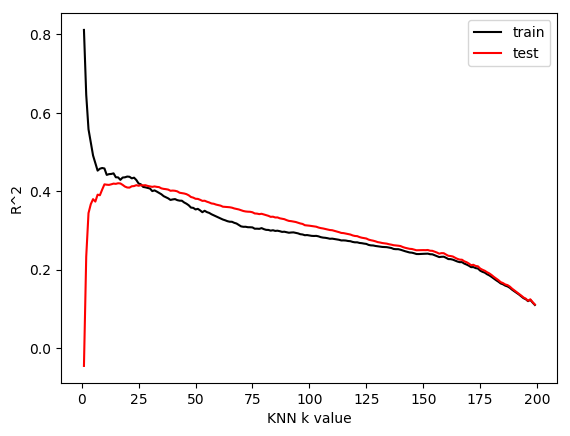

In [12]:
plt.plot(range(1,200),r_train, color = 'k', label = 'train')
plt.plot(range(1,200),r_test, color = 'red', label = 'test')
plt.xlabel('KNN k value')
plt.ylabel('R^2')
plt.legend()
plt.show()

# Part (b): Simple Linear Regression

We next consider parametric approaches for regression, starting with simple linear regression, which assumes that the response variable has a linear relationship with the predictor. Do you see any advantages in using a parametric regression model over k-NN regression?

We suggest that you use the `statsmodels` module for linear regression. This module has built-in functions to summarize the results of regression, and to compute confidence intervals for estimated regression parameters. Create a `OLS` class instance, use the `fit` method in the instance for fitting a linear regression model, and use the `predict` method to make predictions. To include an intercept term in the regression model, you will need to append a column of 1's to the array of predictors using the `sm.add_constant` method. The `fit` method returns a `results` instance. Use the  `results.summary` method to obtain a summary of the regression fit, the `results.params` attribute to get the estimated regression parameters, and the `conf_int` method to compute confidence intervals for the estimated parameters. You may use the `r2_score` function to compute $R^2$.

Using the suggested built-in functions, answer the following questions:

- Fit a linear regression model to the training set, and evaluate its $R^2$ value on both the training and test sets (you may notice something peculiar about how they compare). 
- How does the test $R^2$ score compare with the best test $R^2$ value obtained with k-NN regression in Part (a)?

- Compute confidence intervals:
    - Print the slope and intercept values for the fitted linear model. What does the sign of the slope convey about the data?
    - Compute the 95% confidence interval for the slope and intercept. Based on this information, do you consider the estimates of the model parameters to be reliable?
    - Do you expect a 99% confidence interval for the slope and intercept to be tighter or looser than the 95% confidence intervals? Briefly explain your answer.

- Analyze residual plots:
    - Make a plot of the residuals ${e} = y - \hat{y}$ of the model on the training set as a function of the predictor variable $x$ (i.e. time of day). Draw a horizontal line denoting the zero residual value on the Y-axis.
    - Using this residual plot, comment on whether the assumption of linearity is valid for this data.

1.*Do you see any advantages in using a parametric regression model over k-NN regression?*

One of the biggest advantages to using a parametric regression model over k-NN regression is that the regression and predictions are much less reliant on local data (data "close" to the prediction point). This saves the regression from being drastically affected by outliers or anomalies that happen on only certain areas of the graph.

2.*How does the test $R^2$ score compare with the best test R^2 value obtained with k-NN regression in Part (a)?*

The test $R^2$ score for the parametric regression (linear) was $0.247712$, and the best k-NN regression test $R^2$ score was $0.4200$. This goes to show that k-NN can be much better than a parametric regression with a wrong number of parameters. As we move on from a linear regression to a regression with a higher degree, I predict that we will hit a better $R^2$ than we achieved with k-NN. 

3.*What does the sign of the slope convey about the data?*

Even if the linear regression didn't fit too well, the sign of the slope can give us information about the general trend of the data. If the sign of the slope is possitive, then the trend of the data is upwards. On the contrary, if the sign of the slope is negative, the general trend of the data is downwards.

4.*Compute the 95% confidence interval for the slope and intercept. Based on this information, do you consider the estimates of the model parameters to be reliable?*

Seeing that the two estimates of the model parameters are centered in the confidence interval, I would consider the estimates to be reliable.

5.*Do you expect a 99% confidence interval for the slope and intercept to be tighter or looser than the 95% confidence intervals? Briefly explain your answer.*

A 99% confidence interval should, by definition, be looser than a 95% confidence interval. A confidence interval is the percentage of random tests would fall within that interval, so if the confidence interval grows from 95 to 99, that leaves more room for estimates that would've been outside of a 95% interval but inside a 99% interval. On a bell curve, as the % confidence decreases, the number of possible values tightens around the mean (peak).

6.*Using this residual plot, comment on whether the assumption of linearity is valid for this data.*

The plot shows that the residuals vary greatly from $80$ to $-30$, and we would, ideally, like the residuals to hug the zero-residual line as closely as possible. Based on this plot, I would say the assumpion of linearity is NOT valid for this data.

In [13]:
X_train_c= sm.add_constant(X_train)
X_test_c = sm.add_constant(X_test)
model = sm.OLS(y_train, X_train_c)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     64.82
Date:                Mon, 27 Nov 2017   Prob (F-statistic):           3.43e-14
Time:                        23:37:51   Log-Likelihood:                -1060.1
No. Observations:                 250   AIC:                             2124.
Df Residuals:                     248   BIC:                             2131.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.0264      2.121      8.501      0.000      13.850      22.203
x1            30.2890      3.762      8.051      0.000      22.879      37.699
==============================================================================
Omnibus:                       56.951   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.977
Skew:                           1.202   Prob(JB):                     7.18e-23
Kurtosis:                       5.002   Cond. No.                         4.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

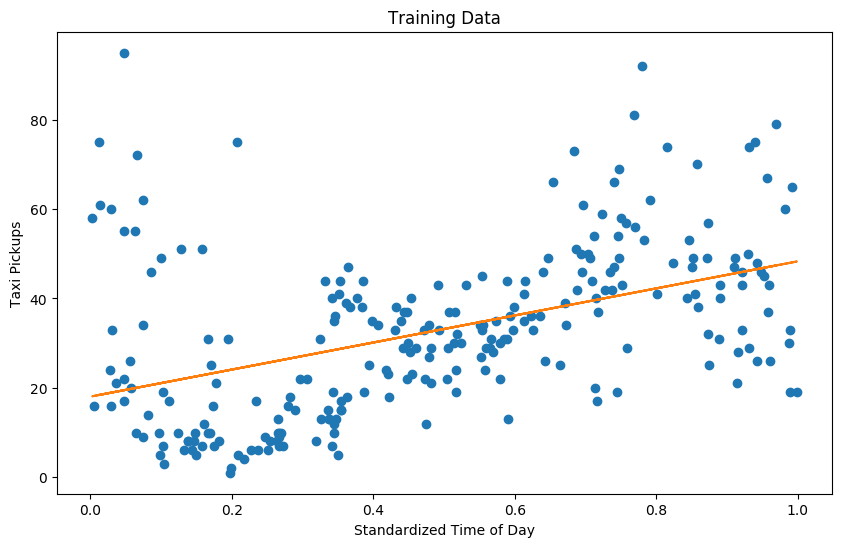

In [14]:
sns.reset_defaults()
plt.figure(figsize=(10, 6))
plt.plot(x_train,y_train, marker='o', linestyle='None')
plt.xlabel('Standardized Time of Day')
plt.ylabel('Taxi Pickups')
plt.title('Training Data')
plt.plot(x_train, results.predict())
plt.show()


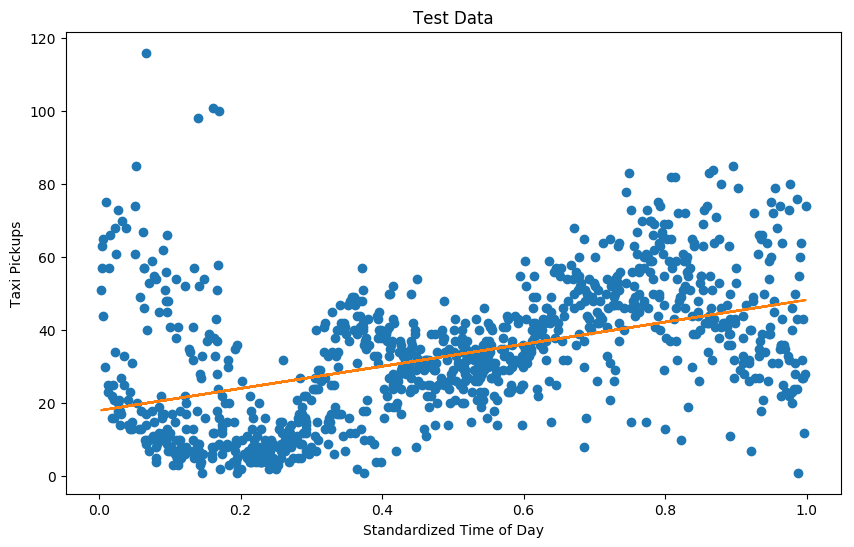

In [15]:
sns.reset_defaults()
plt.figure(figsize=(10, 6))
plt.plot(X_test,y_test, marker='o', linestyle='None')
plt.xlabel('Standardized Time of Day')
plt.ylabel('Taxi Pickups')
plt.title('Test Data')
plt.plot(X_test, results.predict(exog=X_test_c))
plt.show()

In [16]:
train_r2 = r2_score(y_true=y_train, y_pred=results.predict())
test_r2 = r2_score(y_true=y_test, y_pred=results.predict(exog=X_test_c))
print('Training Data R^2 = %f'%train_r2)
print('Test Data R^2 = %f'%test_r2)

Training Data R^2 = 0.207214
Test Data R^2 = 0.247712


In [17]:
params = results.params
print('x_0 = %f (intercept) \nx_1 = %f (slope)' %(params[0], params[1]))

x_0 = 18.026385 (intercept) 
x_1 = 30.289023 (slope)


In [18]:
conf = results.conf_int()
print('95%% Confidence Interval x_0 : (%f, %f)' %(conf[0][0],conf[0][1]))
print('95%% Confidence Interval x_1 : (%f, %f)' %(conf[1][0],conf[1][1])) 

95% Confidence Interval x_0 : (13.849865, 22.202906)
95% Confidence Interval x_1 : (22.879319, 37.698727)


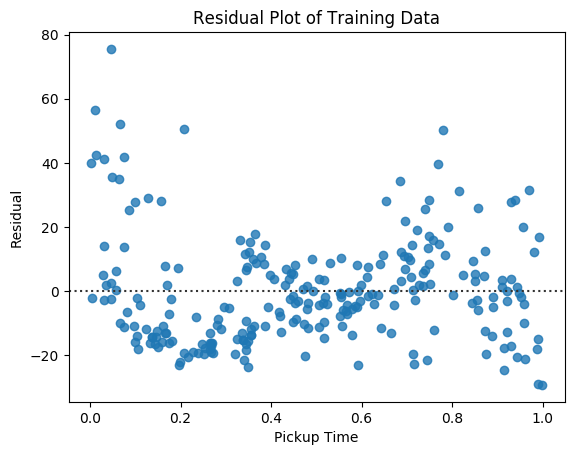

In [19]:
sns.residplot(x_train, y_train)
plt.title('Residual Plot of Training Data')
plt.xlabel("Pickup Time")
plt.ylabel("Residual")
plt.show()

# Part (c): Polynomial Regression

We proceed to higher-order polynomial models for regression:

- By visual inspection, what polynomial degree do you think would provide the best fit for the data?

- At the start of this assignment, we had advised you to normalize the time predictor in the training and test sets to a value in [0,1], and noted that this would be helpful in fitting polynomial regression models. Had the time predictor not been normalized, what difficulties in implementing polynomial regression may have occurred?

- Fit polynomial regression models of degrees 2, 3, 10, 25 and 50 to the training set, and generate visualizations of the fitted models (in the same figure, plot the predicted value from all models as a function of time). 

- Evaluate the $R^2$ value of the fitted models on both the training and test sets. Does a high training $R^2$ value necessarily indicate a high test $R^2$ value? How do the test $R^2$ values from the different polynomial models compare with the test $R^2$ from simple linear regression in Part (b), and the best test $R^2$ from k-NN regression in Part (a)?

- Generate residual plots for the different polynomial regression models (plot of residuals on training set vs. time). How does the increase in polynomial degree effect the residual plots?

*Hint:* You may use the `PolynomialFeatures` class to include polynomial terms in the regression model.

1.*By visual inspection, what polynomial degree do you think would provide the best fit for the data?*

Based on the downward trend at the beggining and at the end, I would think an odd degree would work best. Looking at the humps, I'd guess a 5 degree would provide the best fit for the data.

2.*Had the time predictor not been normalized, what difficulties in implementing polynomial regression may have occurred?*

Technically, the regression should've run the same with an un-normalized time predictor, however, it'd be much harder to do some interpretations. Namely, visually it'd be harder to see which regressions was the best fit.

3.*Does a high training $R^2$ value necessarily indicate a high test R2 value?*

NO! As we discussed in lecture, an $R^2$ variabl that is too high can actually indicate a very low test $R^2$ values because the model is almost always overfitting to the train data. If a regression is overfitted to the train, then the fit with the test data will almost always be off and show no real trend towards the test.

4.*How do the test $R^2$ values from the different polynomial models compare with the test $R^2$ from simple linear regression in Part (b), and the best test $R^2$ from k-NN regression in Part (a)?*
    
The test $R^2$ score for the parametric regression (linear) was 0.247712, and the best k-NN regression test $R^2$ score was 0.4200. There is an upward trend in test $R^2$ for the different polynomial models as the degree increased, until it hits a certain degree where the trend reverses. This reversal point must denote where the models begin to overfit to the train data. However, the best polynomial model gave a test $R^2$ of 0.41551. This actually shows that the best k-NN regression actually outperformed the best polynomial model, although they had very similar test $R^2$ values, proving that k-NN can very effectively produce a prediction.

5.*How does the increase in polynomial degree effect the residual plots?*

As the degree increased, the residual plot showed the residuals tend to hug the 0-residual line more closely. However, as the degree increased to the degree-50 plot, the residuals began to fan farther from the 0-residual line again, showing that at a certain point, the model begins to overfit and the residuals will begin to be farther from correct.

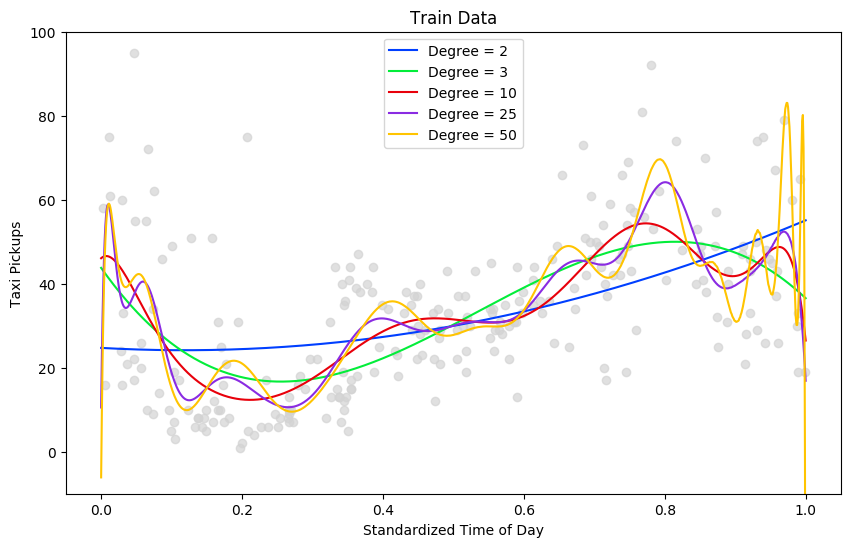

In [25]:
degrees = [2, 3, 10, 25, 50]
sns.reset_defaults()
with sns.color_palette("bright", 5):
    plt.figure(figsize=(10, 6))
    plt.plot(X_train,y_train, marker='o', linestyle='None', alpha = .7, color = 'lightgray')
    plt.xlabel('Standardized Time of Day')
    plt.ylabel('Taxi Pickups')
    plt.title('Train Data')
    for i in degrees: 
        gen_poly_terms = PolynomialFeatures(degree=i)
        X_train_with_poly = gen_poly_terms.fit_transform(X_train)
        poly_regression_model = LinearRegression(fit_intercept=True)
        poly_regression_model.fit(X_train_with_poly, y_train)
        x =  np.linspace(0,1, 1000).reshape(-1,1)
        x_poly = gen_poly_terms.fit_transform(x)
        y = poly_regression_model.predict(x_poly)
        plt.plot(x, y, label = 'Degree = %d' %i)
    plt.legend()
    plt.ylim(-10, 100)
    plt.show()



In [4]:
poly_regression_model = LinearRegression(fit_intercept=True)
r_train =[]
for n in range(1,100): 
    gen_poly_terms = PolynomialFeatures(degree=n)
    X_train_with_poly = gen_poly_terms.fit_transform(X_train)
    poly_regression_model.fit(X_train_with_poly, y_train)
    r_train.append(r2_score(y_train, poly_regression_model.predict(X_train_with_poly)))

r_test =[]
for n in range(1,100): 
    gen_poly_terms = PolynomialFeatures(degree=n)
    X_train_with_poly = gen_poly_terms.fit_transform(X_train)
    X_test_with_poly = gen_poly_terms.fit_transform(X_test)
    poly_regression_model.fit(X_train_with_poly, y_train)
    r_test.append(r2_score(y_test, poly_regression_model.predict(X_test_with_poly)))



NameError: name 'X_train' is not defined

In [5]:
plt.plot(range(1,100),r_train, color = 'k', label = 'train')
plt.plot(range(1,100),r_test, color = 'red', label = 'test')
plt.legend()
plt.title('R^2 VS. Polynomial Degree')
plt.xlabel('Polynomial Regression Degree')
plt.ylabel('R^2')
plt.show()
max(r_test)


ValueError: x and y must have same first dimension, but have shapes (99,) and (0,)

In [6]:
sns.reset_defaults
for i in range(5):
    sns.residplot(x_test, y_test, order=degrees[i])
    plt.title('Residual Plot for Degree %d' %degrees[i])
    plt.xlabel("Pickup Time")
    plt.ylabel("Residual")
    plt.show()

    

NameError: name 'x_test' is not defined

In [7]:
x_test.shape

NameError: name 'x_test' is not defined

# Part (d): Summarize Results
In a brief paragraph (8 or fewer sentences), summarize which of the models seen above you would choose to predict the number of taxi cab pick-ups at any specific time of day.  Be sure to explain your choice. Interpret the model you choose, including which predictors are significant and provide and interpret the CIs for their coefficients (if you choose a regression model). How well does you model predict the number of taxi cab pick-ups?  How would you improve this model even further?  Feel free to refer to visual(s) above or provide a new one to make your case.



---- 


In [330]:
X_train = [[x] for x in x_train]
gen_poly_terms = PolynomialFeatures(degree=9)
X_train_c= sm.add_constant(X_train)
X_train_with_poly = gen_poly_terms.fit_transform(X_train)
model = sm.OLS(y_train, X_train_with_poly)
results = model.fit()
conf = results.conf_int()

In [342]:
for i in range(len(conf)):
    print('B_%d 95%% confidence interval:'%i)
    print(conf[i])
    print('\n')

B_0 95% confidence interval:
[ 33.83324667  71.85496513]


B_1 95% confidence interval:
[-1635.75567523   424.00209401]


B_2 95% confidence interval:
[-10054.04397885  27862.96050777]


B_3 95% confidence interval:
[-260573.31427872   64309.46139503]


B_4 95% confidence interval:
[ -179121.92661165  1331940.07018278]


B_5 95% confidence interval:
[-3899956.50616223   215238.9700875 ]


B_6 95% confidence interval:
[  -11049.83144568  6734369.20667229]


B_7 95% confidence interval:
[-6777636.07807605  -232512.74112538]


B_8 95% confidence interval:
[  213929.52266807  3675086.63641663]


B_9 95% confidence interval:
[-829509.15465706  -61151.78470404]




I would use a polynomial regression model with degree 9. This was the degree that gave the best test $R^2$ score, so we can reasonably assume that it performs the best out of all the polynomial regressions models we tried. I chose this polynomial model with degree 9 over the linear regression model because of the residual plots we made. If you look at the residual plot for linear regression, you can see that the residuals are much farther spread, showing that the model didnt really fit the data very well at all. I chose the polynomial degree 9 regression over the k-NN model (whose test R^2 outperformed all other models) because I saw that the data was a little scattered for some times (as in there were plenty of outliers and fanned out trends), so I wanted a model that didn't react and "jump" at each point based on local trends. The polynomial regression with degree 9 does have coefficients in it that are not significant. Namely, only $B_0, B_7, B_8, B_9$ are significant (determined by seeing if 0 is contained in the CI). This model predicts the data fairly well, but an improvement could be using this model but removing all of the non significant $B$ terms